In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

# Load data and write basic statistics

In [2]:
q = 0.05
df50 = pd.read_csv('../data/diff_exp/DE_N250.csv', index_col='Unnamed: 0')
df58 = pd.read_csv('../data/diff_exp/DE_N258.csv', index_col='Unnamed: 0')
dfTime = pd.read_csv('../data/diff_exp/DE_Time.csv', index_col='Unnamed: 0')
detected = np.intersect1d(df50.index.values.tolist(), df58.index.values.tolist())
print(df50.shape)
print(df58.shape)

(14255, 8)
(12962, 8)


In [3]:
sig50 = df50[df50.padj < q].index.values
sig58 = df58[df58.padj < q].index.values
union = list(set(sig50.tolist() + sig58.tolist()))
intersect = np.intersect1d(sig50, sig58)

In [4]:
print('In 50 hrs: ', len(sig50))
print('In 58 hrs: ', len(sig58))
print('In union: ', len(union))
print('In intersection: ', len(intersect))

In 50 hrs:  1848
In 58 hrs:  3660
In union:  4767
In intersection:  741


In [29]:
df50.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,logq
WBGene00006927,58107.695125,0.588385,0.013034,45.141332,0.000000e+00,0.000000e+00,vit-3,inf
WBGene00006928,69383.163630,0.578175,0.016531,34.975807,5.248781e-268,3.595940e-264,vit-4,263.444188
WBGene00006925,47640.603016,0.583523,0.016692,34.957623,9.917961e-268,4.529864e-264,vit-1,263.343915
WBGene00001564,44128.365451,-0.509980,0.015109,-33.752939,9.680334e-250,3.315998e-246,icl-1,245.479386
WBGene00018393,12297.551943,0.570439,0.019909,28.652904,1.474937e-180,4.041917e-177,msra-1,176.393413


In [30]:
df58.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,logq
WBGene00010790,2742.450319,-0.558617,0.027009,-20.682342,4.995580e-95,6.475271e-91,sodh-1,90.188742
WBGene00001564,30706.427407,-0.326481,0.023245,-14.044954,8.272192e-45,5.361207e-41,icl-1,40.270737
WBGene00014000,1441.703790,-0.434117,0.032406,-13.396353,6.350796e-41,2.743967e-37,ZK550.6,36.561621
WBGene00000712,12118.477883,-0.272456,0.020434,-13.333618,1.475639e-40,4.781808e-37,col-139,36.320408
WBGene00006053,990.230441,-0.528784,0.040876,-12.936435,2.803386e-38,7.267499e-35,ssq-4,34.138615


# Volcano plots

(1831, 8)

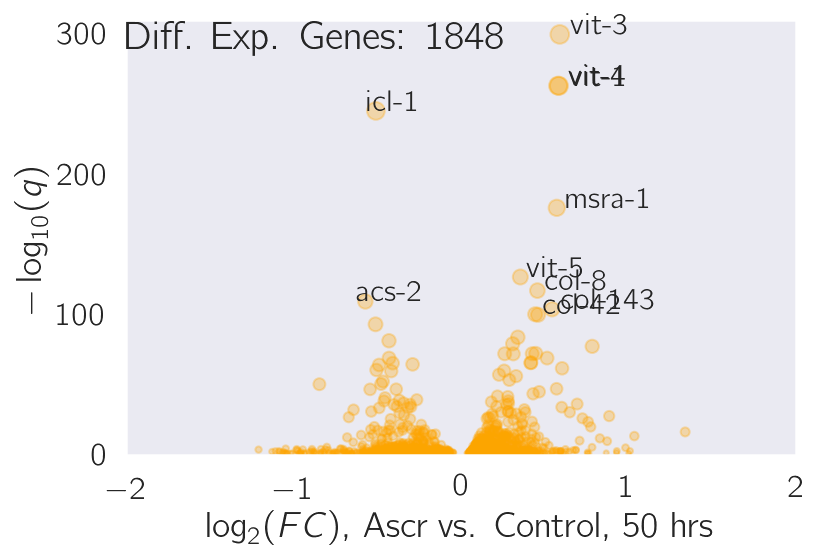

In [56]:
def volcano_plot(data, alpha=0.05, dx=-2, dy=290, ntop=10):
    """
    
    Params:
    data:    pd.DataFrame. Data to plot
    alpha:   float. Point transparency
    dx,dy:   float. Coordinates where to plot #DEG annotation
    ntop:    int. Number of top genes (by q-value) to annotate
    """
    
    df = data.copy().sort_values('padj')
    sig = df.padj < alpha
    ns = df.padj > 1 - alpha
    
    xns = df[ns].log2FoldChange
    yns = df[ns].logq

    xsig = df[sig].log2FoldChange
    ysig = df[sig].logq.replace(np.inf, 300)
    
    #plt.scatter(xns, yns, s=25, alpha=0.01, color='black')
    plt.scatter(xsig, ysig, s=ysig.apply(np.sqrt) * 5,
                alpha=0.3, color='orange')
    plt.ylabel('$-\log_{10}(q)$')

    maxsig = np.max(xsig.abs())
    lim = maxsig + maxsig / 10
    
    plt.annotate('Diff. Exp. Genes: {0}'.format(len(ysig)),
                 (dx, dy), fontsize=20)
    
    for row in df.head(ntop).values:
        y = row[-1]
        y = np.min([y, 300])
        x = row[1]*1.1
        plt.annotate(row[-2], (x, y), fontsize=15)
    
    plt.xlim(-lim, lim)

volcano_plot(df50)
plt.xlim(-2, 2)
plt.ylim(0, 310)

plt.xlabel('$\log_2(FC)$, Ascr vs. Control, 50 hrs')
plt.savefig('../figs/volcano_50hrs.svg', bbox_inches='tight')
df50[df50.padj < 10 ** -10].shape
df50[(df50.padj < q) & (df50.log2FoldChange.abs() < 1)].shape

(3654, 8)

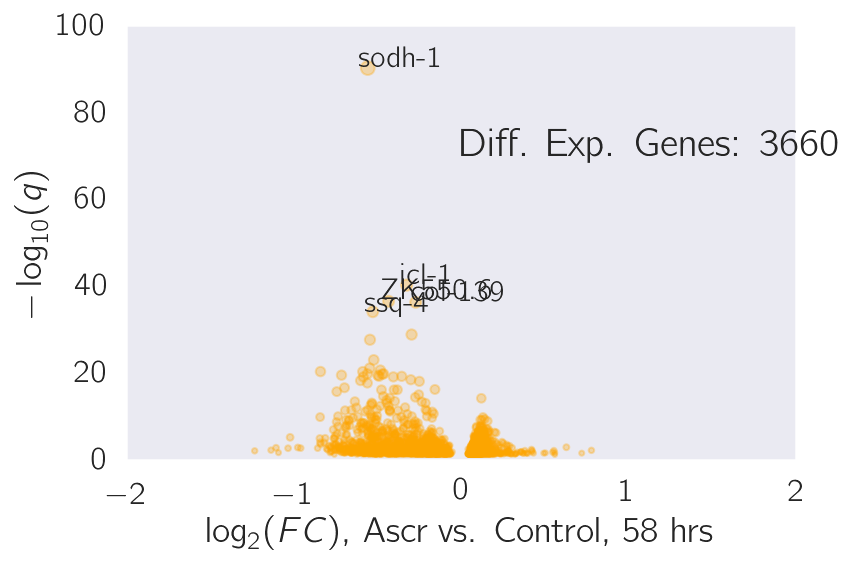

In [57]:
volcano_plot(df58, dx=0, dy=70, ntop=5)
plt.xlim(-2, 2)
plt.ylim(0, 100)
plt.xlabel('$\log_2(FC)$, Ascr vs. Control, 58 hrs')
plt.savefig('../figs/volcano_58hrs.svg', bbox_inches='tight')
# df58[(df58.padj < 0.05) & (df58.log2FoldChange > 0)].shape
df58[(df58.padj < q) & (df58.log2FoldChange.abs() < 1)].shape

# Heatmap comparing response to ascr#10 at 50 vs 58 hrs

In [9]:
df50.reset_index(inplace=True)
df58.reset_index(inplace=True)
df50.columns = ['gene'] + df50.columns[1:].tolist()
df58.columns = ['gene'] + df58.columns[1:].tolist()
sub50 = df50[df50.gene.isin(union)].sort_values('gene').copy()
sub58 = df58[df58.gene.isin(union)].sort_values('gene').copy()
merged = sub50.merge(sub58, left_on='gene', right_on='gene', suffixes=('50h', '58h'))
print(len(merged))

4553


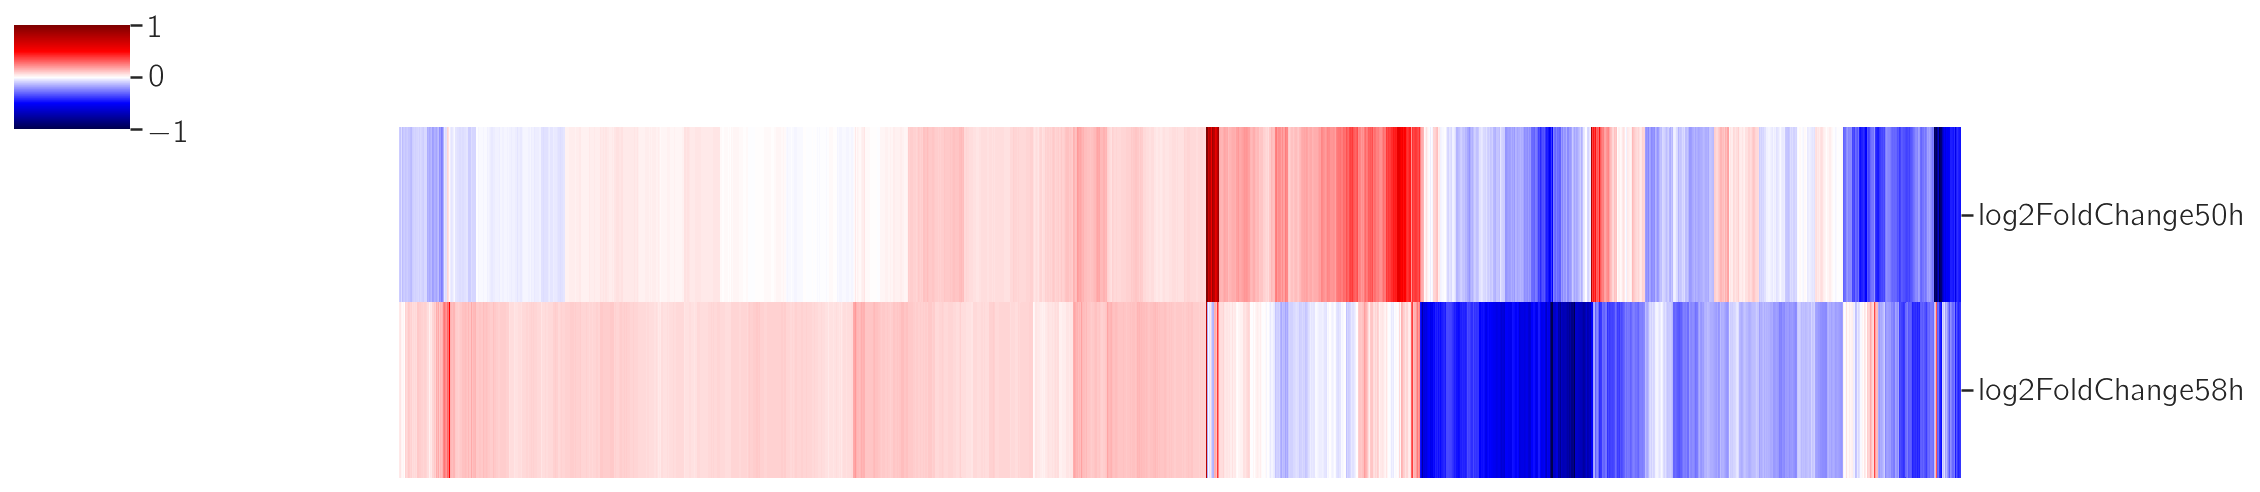

In [10]:
cg = sns.clustermap(merged[['log2FoldChange50h', 'log2FoldChange58h']].T, figsize=(16, 4), cmap='seismic',
                    center=0, vmin=-1, vmax=1, method='ward', row_cluster=True,
                    cbar_kws={'use_gridspec': False})
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.set_xticks([])
plt.savefig('../figs/heatmap_union.svg', bbox_inches='tight')

[]

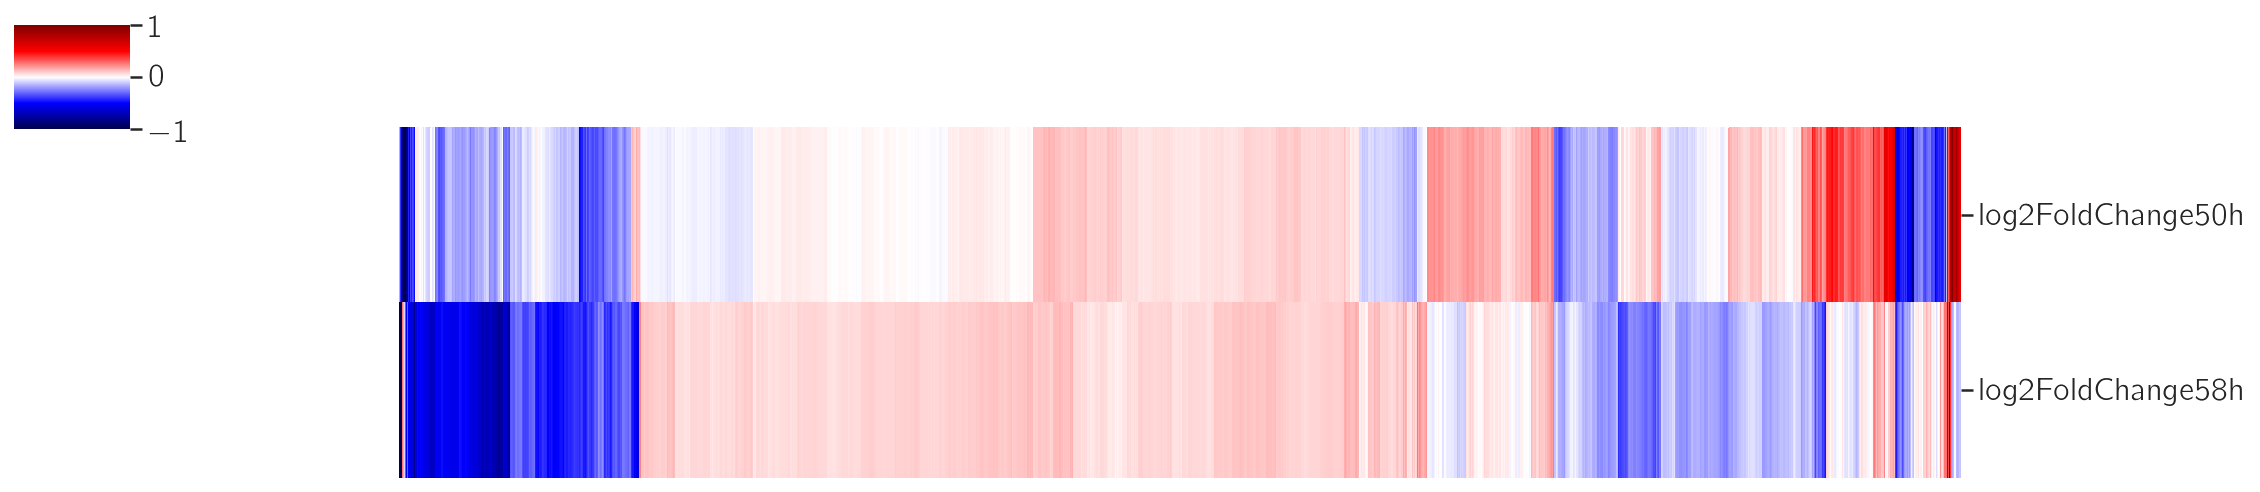

In [11]:
cg = sns.clustermap(merged[['log2FoldChange50h', 'log2FoldChange58h']].T, figsize=(16, 4),
                    cmap='seismic', center=0, vmin=-1, vmax=1, method='centroid',
                    row_cluster=True)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
ax = cg.ax_heatmap
ax.set_xticks([])
# plt.savefig('../figs/heatmap_union.svg', bbox_inches='tight')

Text(0.5, 0, '$\\log_{10}(p_{adj})$')

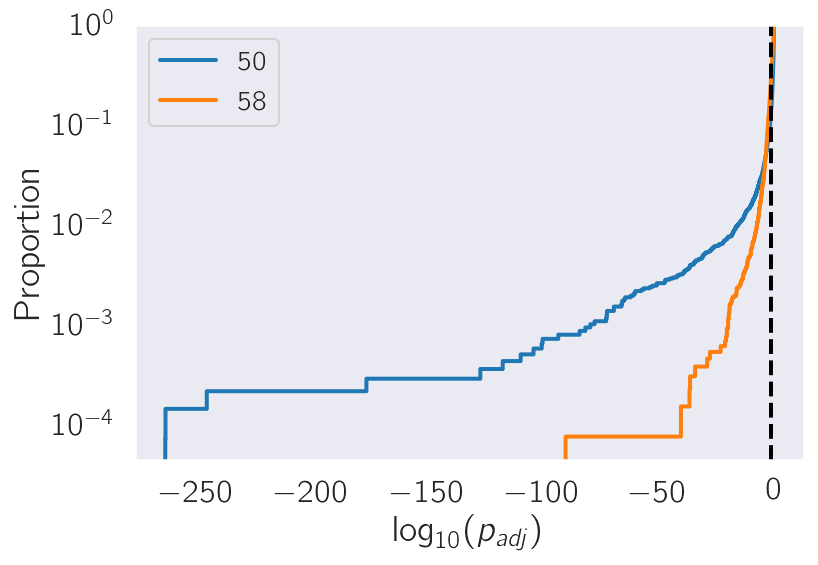

In [12]:
sns.ecdfplot(df50.padj.apply(np.log10), label='50')
sns.ecdfplot(df58.padj.apply(np.log10), label='58')
plt.axvline(np.log10(0.05), color='black', ls='--')
plt.yscale('log')
plt.legend()
plt.xlabel('$\log_{10}(p_{adj})$')

##### 

# Calculate significance of overlap

In [13]:
q = 0.05
# Hypergeom calculation:
df50 = df50[df50.gene.isin(detected)]
df58 = df58[df58.gene.isin(detected)]

# DEGs out of commonly detected expression levels:
sig50 = df50[df50.padj < q].gene.values
sig58 = df58[df58.padj < q].gene.values

# find union:
union = list(set(sig50.tolist() + sig58.tolist()))
intersect = np.intersect1d(sig50, sig58)
print(len(detected))

12421


In [14]:
print('In 50 hrs: ', len(sig50))
print('In 58 hrs: ', len(sig58))
print('In union: ', len(union))
print('In intersection: ', len(intersect))

In 50 hrs:  1667
In 58 hrs:  3627
In union:  4553
In intersection:  741


In [15]:
[M, n, N] = [len(detected),
             np.max([len(sig50), len(sig58)]),
             np.min([len(sig50), len(sig58)])
            ]
k = len(intersect)
scipy.stats.hypergeom.sf(k - 1, M, n, N)

3.272099682500554e-46

In [16]:
from platform import python_version

print(python_version())


3.7.10


In [17]:
import matplotlib as mat

In [18]:
mat.__version__

'3.3.4'

In [19]:
scipy.__version__

'1.6.2'

In [20]:
sns.__version__

'0.11.2'

In [21]:
np.__version__

'1.19.2'

In [22]:
df50 = pd.read_csv('../data/diff_exp/DE_N250_shrunken.csv', index_col='Unnamed: 0')
df58 = pd.read_csv('../data/diff_exp/DE_N258_shrunken.csv', index_col='Unnamed: 0')
df50['sig'] = df50.padj < 0.05
df58['sig'] = df58.padj < 0.05

,baseMean,log2FoldChange,lfcSE,pvalue,padj,sig
WBGene00006927,58107.695125,0.587858,0.013040,0.000000e+00,0.000000e+00,True
WBGene00006928,69383.163630,0.577296,0.016542,5.248781e-268,3.523244e-264,True
WBGene00006925,47640.603016,0.582786,0.016704,9.917961e-268,4.438288e-264,True
WBGene00001564,44128.365451,-0.509875,0.015119,9.680334e-250,3.248962e-246,True
WBGene00018393,12297.551943,0.569141,0.019931,1.474937e-180,3.960205e-177,True
WBGene00009221,6620.476035,-0.570955,0.025347,1.350197e-113,2.265799e-110,True
WBGene00000716,8711.937939,0.540413,0.024624,5.644523e-108,8.419747e-105,True
WBGene00021627,8495.851094,-0.510049,0.024540,3.834591e-97,4.289948e-94,True
WBGene00001399,2204.440863,0.777870,0.041055,2.642735e-81,2.217420e-78,True
WBGene00016892,5003.004081,0.509628,0.028483,8.336659e-73,5.128127e-70,True


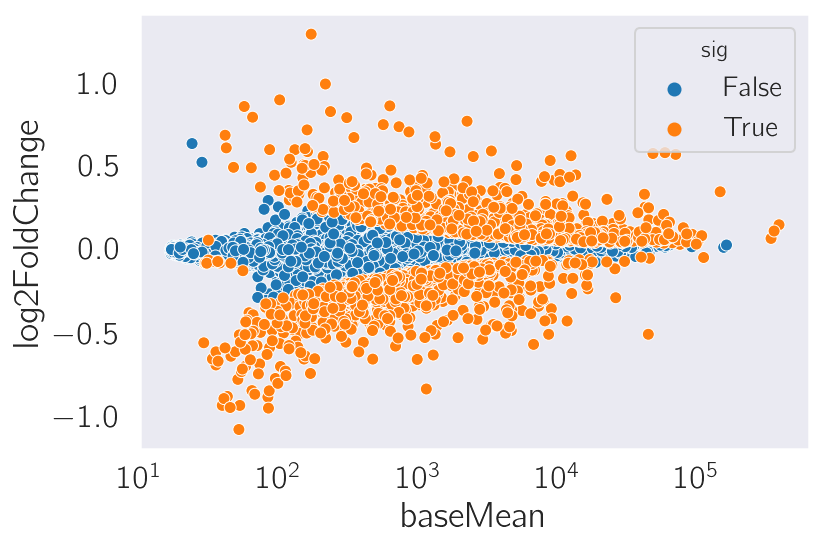

In [23]:
sns.scatterplot(data=df50.sort_values('sig'), x='baseMean', y='log2FoldChange', hue='sig')
plt.xscale('log')
df50[(df50.baseMean > 10 ** 3) & (df50.log2FoldChange.abs() > 0.5)].sort_values('padj')

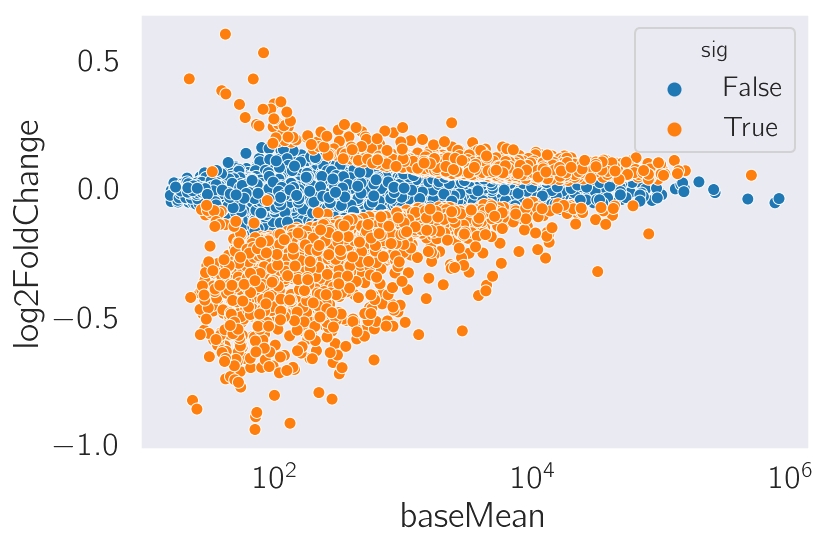

In [24]:
sns.scatterplot(data=df58.sort_values('sig'), x='baseMean', y='log2FoldChange', hue='sig')
plt.xscale('log')

In [25]:
df50[df50.log2FoldChange > 1]

,baseMean,log2FoldChange,lfcSE,pvalue,padj,sig
WBGene00008354,167.633613,1.304069,0.150289,2.133969e-19,2.238166e-17,True
WBGene00020674,212.079071,1.002632,0.127992,2.392703e-16,2.033040e-14,True
